<a href="https://colab.research.google.com/github/Ana1890/Brain-Tumor-Classification/blob/main/BrainTumorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instagram: @elrincondelingbiomedico 

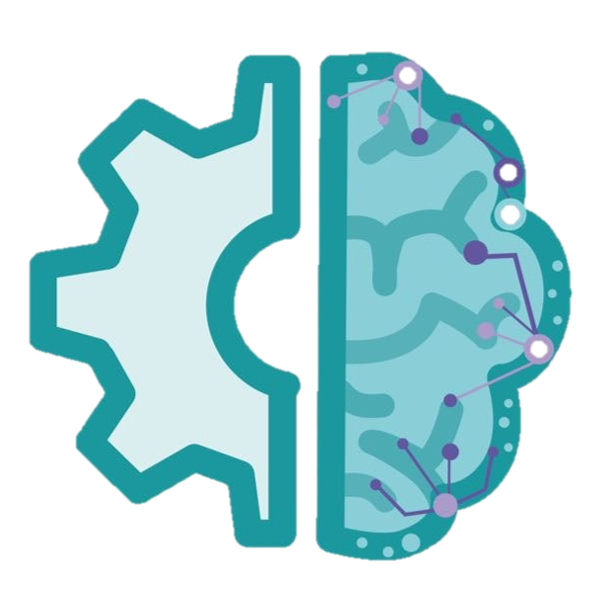


**Introducción** 

En este cuaderno, vais ha desarrollar un modelo supervisado de clasificación por tipos de cáncer cerebral.

Se utilizará el concepto de aprendizaje de transferencia para que obtener resultados precisos en poco tiempo.

Esperemos que os guste!

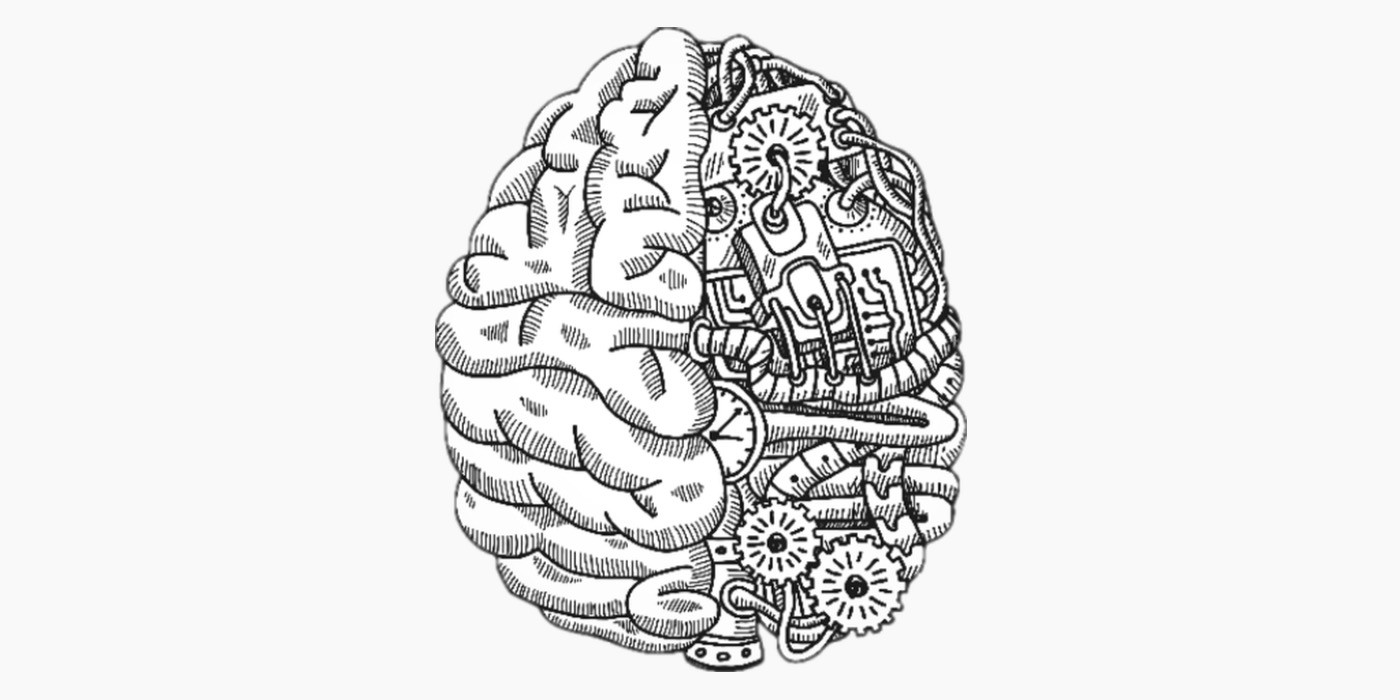

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#/content/gdrive/My Drive/


Mounted at /content/drive


**Importar librerias**

In [ ]:
drive = '/content/drive/MyDrive'
name_folder = '/Brain Tumor Classification/RECURSOS DEL TALLER'
path=drive+name_folder

import os
#Comprobar que estamos dentro de Drive
for dirname, _, filenames in os.walk(path):
  for filename in filenames:
    if filename==filenames[0]:
      print(os.path.join(dirname, filename))

/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/BrainTumorClassification.ipynb
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/.ipynb_checkpoints/BrainTumorClassification-checkpoint.ipynb
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/data/BrainTumorClassification.ipynb
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/data/Testing/glioma_tumor/image(4).jpg
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/data/Testing/no_tumor/image(14).jpg
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/data/Testing/pituitary_tumor/image(13).jpg
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/data/Testing/meningioma_tumor/image(34).jpg
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/data/Training/glioma_tumor/gg (15).jpg
/content/drive/MyDrive/Brain Tumor Classification/RECURSOS DEL TALLER/data/Training/no_tumor/8.jpg
/content/dri

**Concepto de imagen en la programación**

Las imágenes en el mundo de la imagen médica se traducen en matrices de números normalmente entre los valores [0,256]. 

Por lo tanto, las imágenes las vemos así:

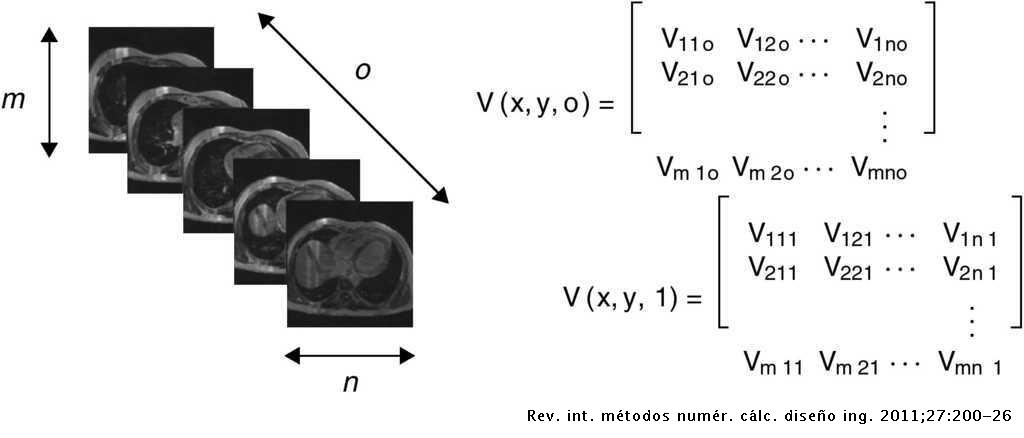

**Preparación de los datos**



La preparación de los datos es esencial para que los datos sean entrenados.

En realidad estas imágenes necesitan de un preprocesado, siendo obligatorio cumplir con lo siguiente.


*   Mismo tamaño de imágenes para todas. Normalmente está entre 128x128, 256x256 y 512x512. Pero también pueden ser más pequeñas.

**Pregunta**: ¿Por què no deberíamos de hacerlas muy pequeñas si queremos encontrar alguna característica muy específica en las imágenes?



*   Normalización de los valores de la imagen. Las imágenes son matrices de números entre los valores 0-256. Para poder entrenar una red neuronal, se debe de poner estos valores entre [0,1].


* Normalmente hay que realizar un preprocesado de las imágenes, pero en este caso el dataset ya lo está.

**¿Cómo es nuestro conjunto de datos?**

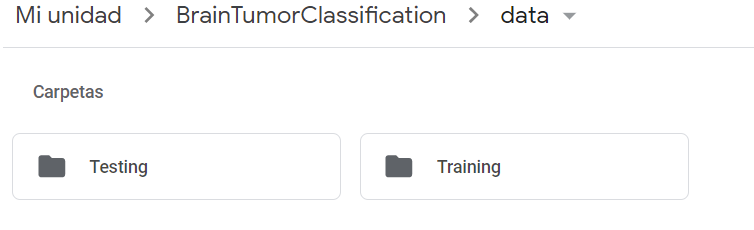

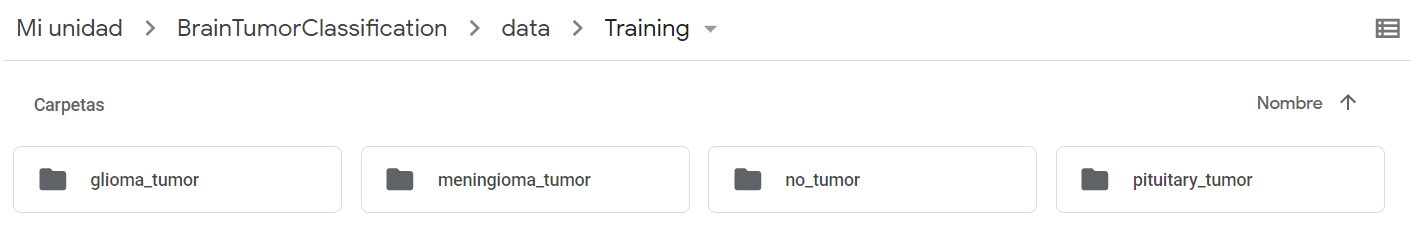

Tenemos las imágenes dividas por carpetas que son las clases. Nosotros vamos a hacer un modelo que sepa clasificar estos tres tipos de cáncer cerebral.

Clases:

*   No tumor = 0
*   Glioma = 1
*   Meningioma =2
*   Tumor en la pituitaria = 3




In [ ]:
labels = ['no_tumor','glioma_tumor','meningioma_tumor','pituitary_tumor']

# **Cargar datos**

*   Método convencional --> Ocupa bastante memoria

*   ImageDataGenerator --> no ocupa tanta memoria y es más eficiente. Se le puede aplicar un aumento de los datos si se desea.



**Método convencional**

In [ ]:
# from tqdm import tqdm
# import cv2
# import numpy as np
# from sklearn.utils import shuffle

# #TRAIN
# X_train = []
# y_train = []
# image_size = 128 #tamaño de la imagen deseado

# for i in labels: #convertimos las etiquetas en números.
#     folderPath = os.path.join(path,'data','Training',i)
#     for j in tqdm(os.listdir(folderPath)):
#         img = cv2.imread(os.path.join(folderPath,j)) #cargar la imagen.
#         img = cv2.resize(img,(image_size, image_size)) # que todas las imágenes tengan el mismo tamaño.
#         X_train.append(img)  #juntar todos los datos ne una lista
#         y_train.append(i) #adjuntar todos las etiquetas en lista 

# X_train = np.array(X_train)
# y_train = np.array(y_train)
# X_train, y_train = shuffle(X_train,y_train, random_state=101) #cambiar el orden y que las patologías no estén seguidas.
# X_train.shape


# import matplotlib.pyplot as plt
# #VISUALIZAR EL CONTENIDO QUE TENEMOS DENTRO DE LA LISTA
# k=0
# fig, ax = plt.subplots(1,4,figsize=(20,20))
# fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
#              fontname='monospace',y=0.62,x=0.4,alpha=0.8)
# for i in labels:
#     j=0
#     while True :
#         if y_train[j]==i:
#             ax[k].imshow(X_train[j], cmap='gray')
#             ax[k].set_title(y_train[j])
#             ax[k].axis('off')

#             k+=1
#             break
#         j+=1




# #TEST
# ???

Dividing the dataset into Training and Testing sets.

Realización de **One Hot Encoding** en las etiquetas después de convertirlas en valores numéricos:



In [ ]:
# import tensorflow as tf

# #TRAIN
# y_train_new = []
# for i in y_train:
#   y_train_new.append(labels.index(i))
# y_train = y_train_new
# y_train = tf.keras.utils.to_categorical(y_train)

# #TEST
# ????

ES TU TURNO! Ahora tienes que hacer para el dataset de Test!

**Partición de datos**

Para crear un modelo, los datos tienen que ser partidos en 3 partes. 


1.   Training - conjunto de datos más grande con el que entrenaremos la red.
2.   Validation - Conjunto de datos para validar dentro del entrenamiento. 
3.   Test - Conjunto de datos para testear el modelo ya entrenado.

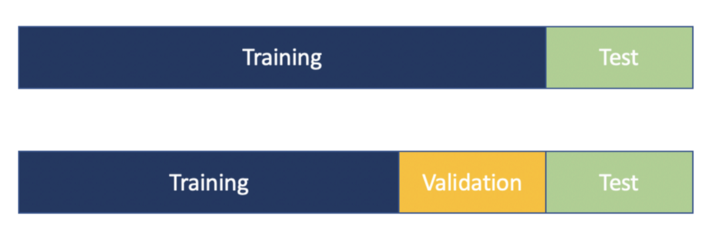


from sklearn.model_selection import train_test_split

Usar esta libreria para hacer la partición de datos TRAIN a TRAIN + VALIDATION con un tamaño de partición test_size=0.15

In [ ]:
# from sklearn.model_selection import train_test_split
# #Realizar la partición de los datos. 
# #train --> Train + Validation
# X_train, X_val, y_train, y_val =  ?


**ImageDataGenerator**

El segundo método más eficiente para cargar los imágenes es aplicando ImageDataGenerator

¿Qué es un data augmentation?

El aumento de datos engloba una amplia gama de técnicas utilizadas para generar "nuevas" muestras de entrenamiento a partir de las originales, aplicando saltos y perturbaciones aleatorias (pero garantizando al mismo tiempo que no se modifiquen las etiquetas de clase de los datos).

Por ejemplo, podemos obtener datos aumentados a partir de las imágenes originales aplicando transformaciones geométricas simples, como las aleatorias:

* Traslación
* Rotaciones
* Cambios de escala
* Cizallamiento
* Volteos horizontales (y en algunos casos, verticales)

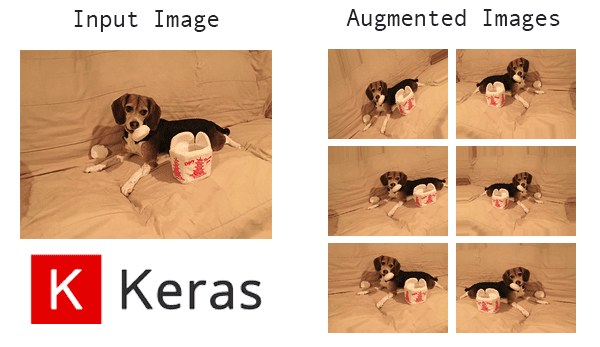

Transformaciones geométricas:

*   Rotación de 20 grados
*   Traslación horizontal
*   Normalización
* Partición de los datos para la validación igual al anterior.

Found 2441 images belonging to 4 classes.
Found 429 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


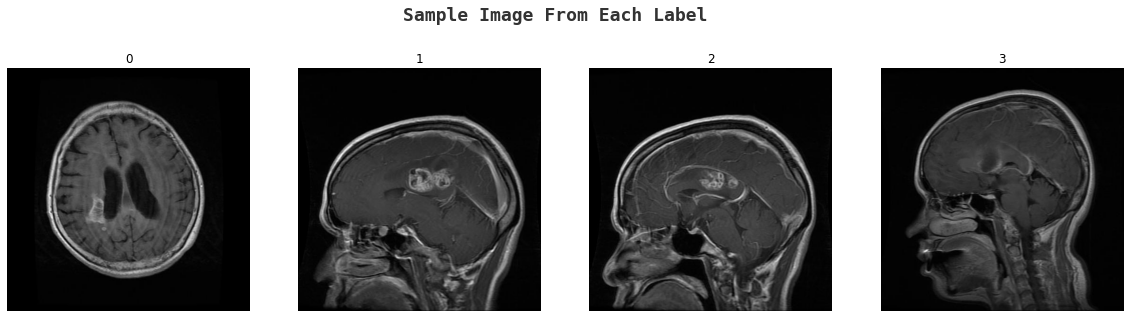

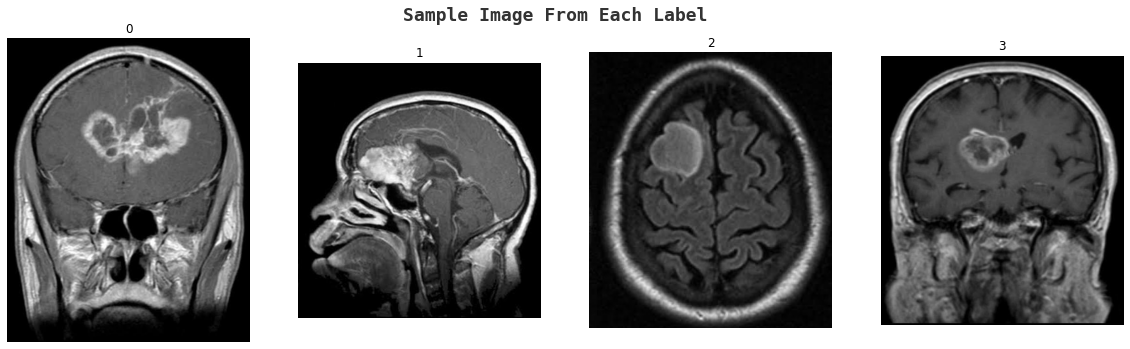

In [ ]:
################################
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2


#train
def cargar_datos_train(image_size, batch_size,class_mode, data_augmentation='FALSE'):

    if data_augmentation==True:
        datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, rescale=1./255, validation_split=0.15) #Aumento de datos con transformaciones geométricas en la imagen.

    else:
        datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15) 

      #Cargamos las imágenes desde las carpetas
    train = datagen.flow_from_directory(directory=path+'/data/Training', batch_size=batch_size, class_mode=class_mode,
                                                  color_mode='rgb', target_size=(image_size, image_size),
                                                  shuffle=True, subset='training')

    val = datagen.flow_from_directory(directory=path+'/data/Training', batch_size=batch_size, class_mode=class_mode,
                                                  color_mode='rgb', target_size=(image_size, image_size),
                                                  shuffle=False, subset='validation')

      #Representar  imagen de cada clase
    k=0
    fig, ax = plt.subplots(1,4,figsize=(20,20))
    fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
                  fontname='monospace',y=0.62,x=0.4,alpha=0.8)
    for i in range(len(labels)):
      for j in np.arange(0, len(train.classes)):
            if j==i:
                #print(path+'Training/'+train.filenames[j])
                img = cv2.imread(path+'/data/Training/'+train.filenames[j])
                ax[k].imshow(img,cmap='gray')
                ax[k].set_title(i)
                ax[k].axis('off')
                k=k+1

    return train, val


image_size= 128
batch_size= 16
class_mode= 'categorical' # MÁS DE 2 CLASES
data_augmentation= True 

train, val = cargar_datos_train(image_size, batch_size,class_mode, data_augmentation=data_augmentation)


#TEST
def cargar_datos_test(image_size, batch_size,class_mode, data_augmentation='FALSE'):
    
    if data_augmentation==True:
        datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, rescale=1./255, validation_split=0.15) #Aumento de datos con transformaciones geométricas en la imagen.

    else:
        datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15) 

      #Cargamos las imágenes desde las carpetas
    test = datagen.flow_from_directory(directory=path+'/data/Testing', batch_size=batch_size, class_mode=class_mode,
                                                  color_mode='rgb', target_size=(image_size, image_size),
                                                  shuffle=False)


      #Representar  imagen de cada clase
    k=0
    fig, ax = plt.subplots(1,4,figsize=(20,20))
    fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
                  fontname='monospace',y=0.62,x=0.4,alpha=0.8)
    for i in range(len(labels)):
      for j in np.arange(0, len(test.classes)):
            if j==i:
                #print(path+'Training/'+train.filenames[j])
                img = cv2.imread(path+'/data/Testing/'+test.filenames[j])
                ax[k].imshow(img,cmap='gray')
                ax[k].set_title(i)
                ax[k].axis('off')
                k=k+1
    return test


image_size= 128
batch_size= 16
class_mode= 'categorical' # MÁS DE 2 CLASES
data_augmentation= False 

test = cargar_datos_test(image_size, batch_size,class_mode, data_augmentation=data_augmentation)

* En train shuffle es True y en test y val shuffle es False

Found 2441 images belonging to 4 classes.
Found 429 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


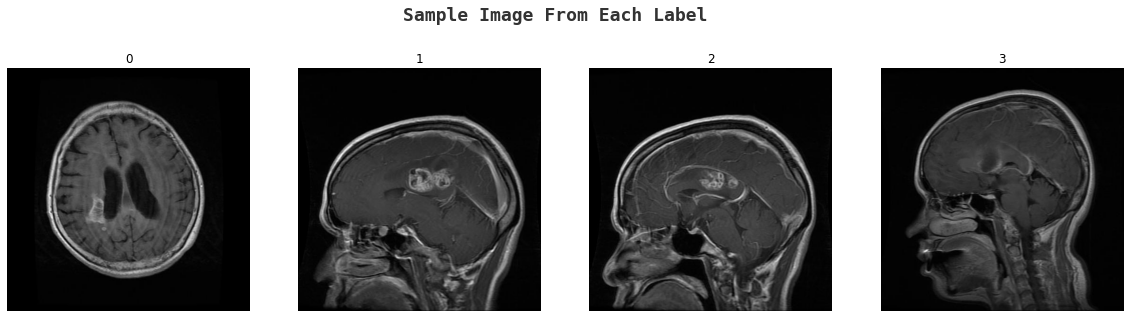

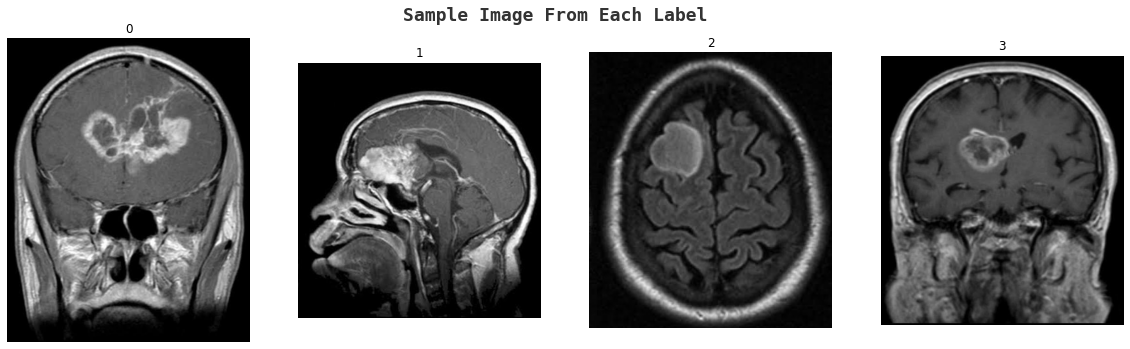

In [ ]:
#COMPROBAR QUE FUNCIONAN
image_size=128
batch_size=16
data_augmentation=True
class_mode= 'categorical'

train, val = cargar_datos_train(image_size, batch_size,class_mode, data_augmentation=data_augmentation)
test = cargar_datos_test(image_size, batch_size,class_mode, data_augmentation=data_augmentation)

# **REDES NEURONALES**

SE DIVIDE EN DOS PARTES:


1.   EXTRACTOR DE CARACTERÍSTICAS
2.   CLASIFICADOR


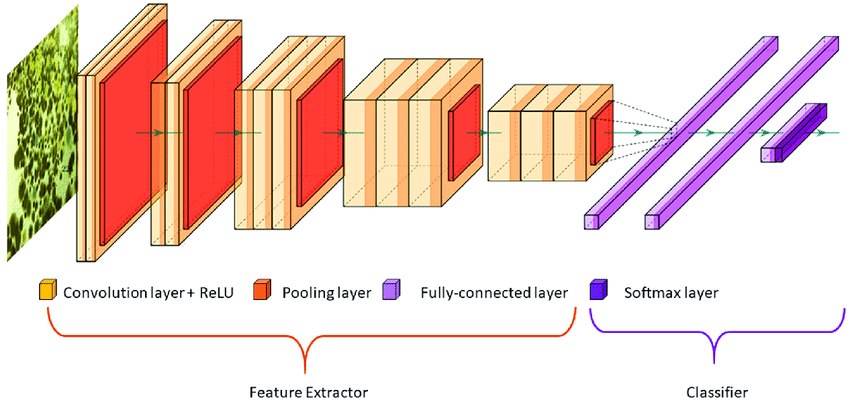



Pasos a seguir:

1.   Definir la parte de extracción de características: 
*   Convoluciones: Conv2d
*   Disminución de dimensiones: AveragePooling, MaxPooling


2.   Definir el top_model: GlobalAveragePooling (GAP), GlobalMaxPooling(GMP), Flatten Dense (FD)

**Convolucion**

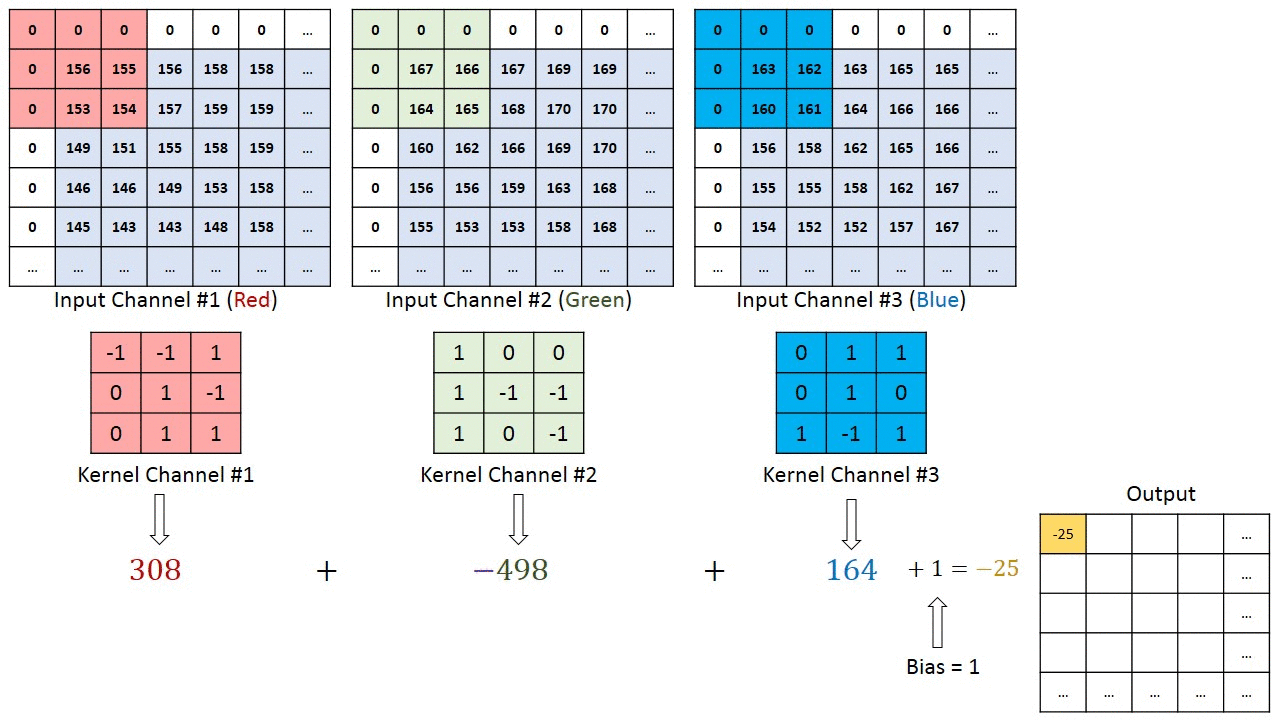

**Reducción de dimensiones**

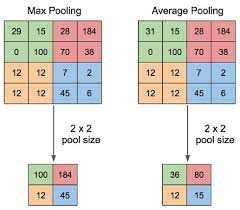

**Ejemplo**

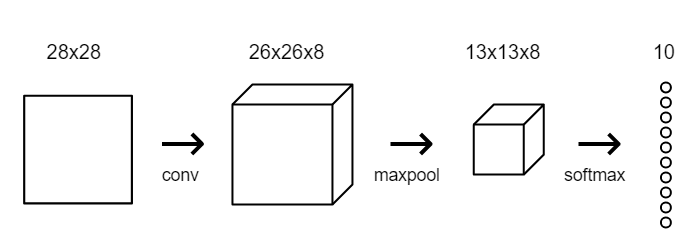

In [ ]:
#Ejemplo:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
import tensorflow.keras as keras
from tensorflow.keras.applications import VGG16 

#Definir parte de extracción de características
def modelo_preentrenado(input_shape):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
  return base_model

#Tipo 1
def EXAMPLE_MODEL(input_shape):
  base_model = Sequential() #empezar
  base_model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape)) #primera capa
  base_model.add(MaxPool2D(pool_size=2))
  base_model.add(Conv2D(32, kernel_size=3, activation='relu')) #capas intermedias
  base_model.add(MaxPool2D(pool_size=2))
  base_model.add(Conv2D(16, kernel_size=3, activation='relu',  name="last_layer")) #capas intermedias
  return base_model

#Tipo 2
def OWN_MODEL(input_shape):
  ?
  return base_model

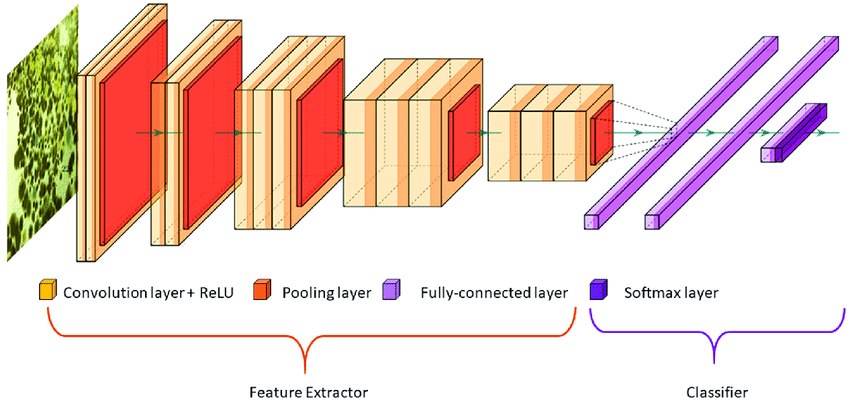

In [ ]:
# Definir top model
def _get_top_model(base_model, top_model, num_classes):
    # Convierte la información a un vector antes de entrar al clasificador
    output = base_model.layers[-1].output

    if top_model == 'GMP':# global max pooling
        x = keras.layers.GlobalMaxPooling2D()(output)

    elif top_model == 'GAP':#global average pooling
        x = keras.layers.GlobalAveragePooling2D()(output)

    elif top_model == "FD":#flatten
        x = keras.layers.Flatten()(output)
        x = keras.layers.Dense(1024, activation='relu')(x)
        x = keras.layers.Dropout(0.25)(x)
        x = keras.layers.Dense(256, activation='relu')(x)


    out = keras.layers.Dense(num_classes, activation='softmax')(x) #4clases

    model = keras.Model(inputs=base_model.input, outputs=out)
    model.summary()
    return model

In [ ]:
top_model= 'FD'#'GMP' #GAP, FD, GMP
n_classes=len(labels)

base_model=modelo_preentrenado(input_shape=(image_size,image_size,3))
model1=_get_top_model(base_model, top_model, n_classes)


base_model=EXAMPLE_MODEL(input_shape=(image_size,image_size,3))
model2=_get_top_model(base_model, top_model, n_classes)


# base_model=OWN_MODEL(input_shape=(image_size,image_size,3))
# model3=_get_top_model(base_model, top_model, n_classes)

Model: "model_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0  

In [ ]:
def _get_optimizer(optimizer_model, lr_n):
    print("[INFO] Getting the optimizer: ", optimizer_model)
    # Initiate the optimizer.
    if optimizer_model == 'Adam':
        opt = Adam(lr_n)

    elif optimizer_model == 'Adagrad':
        opt = Adagrad(lr_n)

    elif optimizer_model == 'Adadelta':
        opt = Adadelta(lr_n)

    elif optimizer_model == 'SGD':
        opt = SGD(lr_n)
    else:
        raise ValueError('Optimizer not implemented yet!')
    return opt

def plot_learningcurves(H):
  # Save curves training
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(H.history['accuracy'])
  plt.plot(H.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  plt.figure()
  plt.plot(H.history['loss'])
  plt.plot(H.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

Found 2441 images belonging to 4 classes.
Found 429 images belonging to 4 classes.
Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50_input (InputLayer  [(None, 64, 64, 3)]      0         
 )                                                               
                                                                 
 conv2d_50 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
152/152 [==============================] - 20s 123ms/step - loss: 1.1565 - accuracy: 0.4866 - val_loss: 1.1454 - val_accuracy: 0.4111
Epoch 2/10
152/152 [==============================] - 18s 120ms/step - loss: 0.8250 - accuracy: 0.6557 - val_loss: 1.0529 - val_accuracy: 0.4688
Epoch 3/10
152/152 [==============================] - 18s 120ms/step - loss: 0.6718 - accuracy: 0.7324 - val_loss: 1.1057 - val_accuracy: 0.4567
Epoch 4/10
152/152 [==============================] - 19s 122ms/step - loss: 0.5527 - accuracy: 0.7781 - val_loss: 0.9190 - val_accuracy: 0.6250
Epoch 5/10
152/152 [==============================] - 19s 122ms/step - loss: 0.4608 - accuracy: 0.8194 - val_loss: 0.9269 - val_accuracy: 0.6250
Epoch 6/10
152/152 [==============================] - 18s 120ms/step - loss: 0.3883 - accuracy: 0.8507 - val_loss: 1.1271 - val_accuracy: 0.5841
Epoch 7/10
152/152 [==============================] - 18s 119ms/step - loss: 0.3360 - accuracy: 0.8660 - val_loss: 0.9386 - val_ac

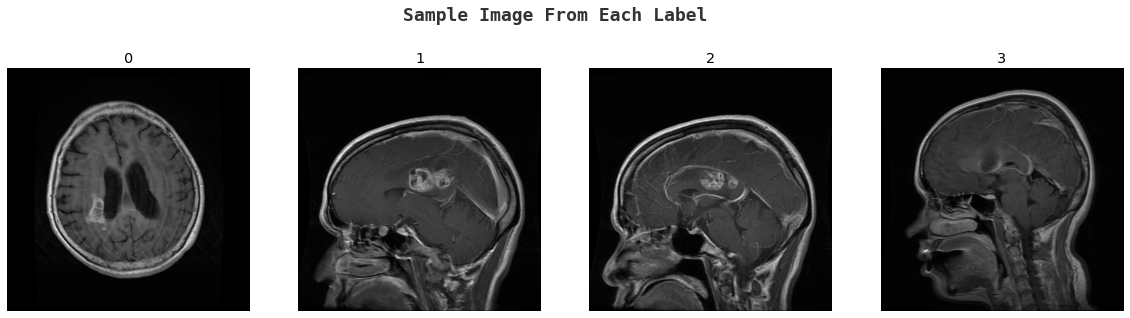

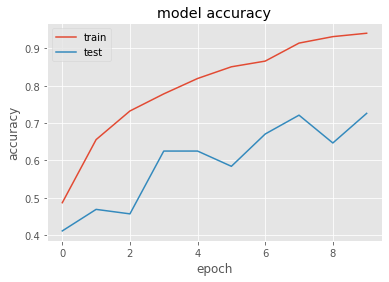

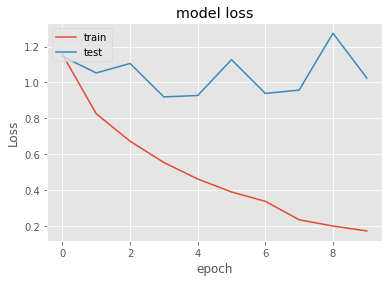

In [ ]:
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, SGD
from keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report


# Define las variables
image_size=64
batch_size=16
data_augmentation=False
class_mode= 'categorical'
train, val = cargar_datos_train(image_size, batch_size,class_mode, data_augmentation=data_augmentation)

# Estos parámetros dependen del dataset que estemos utilizando
optimizer='Adagrad' #'SGD','Adam', 'Adadelta', 'Adagrad'
loss_fun= 'categorical_crossentropy' #más de 2 clases
learning_rate= 0.01 #0.5

n_classes = len(labels)
num_epochs=10 # cantidad de oportunidades


#Definir el modelo
base_model=EXAMPLE_MODEL(input_shape=(image_size,image_size,3))
model=_get_top_model(base_model, top_model, n_classes)


model.compile(optimizer=_get_optimizer(optimizer, learning_rate), loss=loss_fun, metrics=['accuracy'])

#Entrenamiento
print('[INFO] Training model')
H = model.fit_generator(generator=train, steps_per_epoch=train.n//train.batch_size,
                                      epochs=num_epochs, verbose=1, validation_data=val,
                                      validation_steps=val.n//val.batch_size)
plot_learningcurves(H)


Con optimizer='adagrad' llega a mejores resultados en el mismo tiempo

Found 394 images belonging to 4 classes.


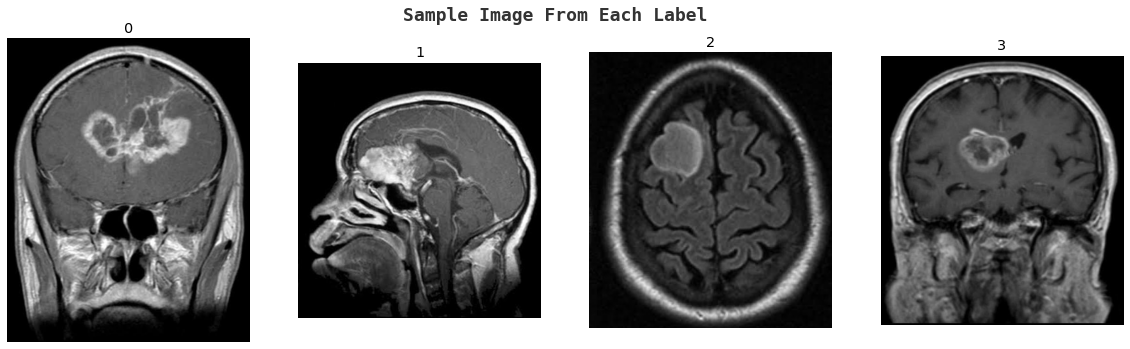

In [ ]:
#Evaluación
test = cargar_datos_test(image_size, batch_size, class_mode, data_augmentation=data_augmentation)

In [ ]:
labels

['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']

In [ ]:
np.unique(test.labels)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
preds = model.predict_generator(test)

y_pred = preds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_true = test.labels
y_true=np.array(y_true)
# # la probabilidad de que sea un no tumor:
# y_pred=np.array(y_pred[:,0])
y_pred = np.array(y_pred)  

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=labels))

## Clean GPU memory
# del model
# tf.keras.backend.clear_session()

[[ 19  37  39   5]
 [  0 114   1   0]
 [  0   2 102   1]
 [  5  34  22  13]]
                  precision    recall  f1-score   support

        no_tumor       0.79      0.19      0.31       100
    glioma_tumor       0.61      0.99      0.75       115
meningioma_tumor       0.62      0.97      0.76       105
 pituitary_tumor       0.68      0.18      0.28        74

        accuracy                           0.63       394
       macro avg       0.68      0.58      0.52       394
    weighted avg       0.67      0.63      0.55       394

